<a href="https://colab.research.google.com/github/UTKARSHSAHAREE/Utkarshsahare/blob/main/Label_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
df=pd.read_csv("/content/50_Startups.csv")

In [176]:
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


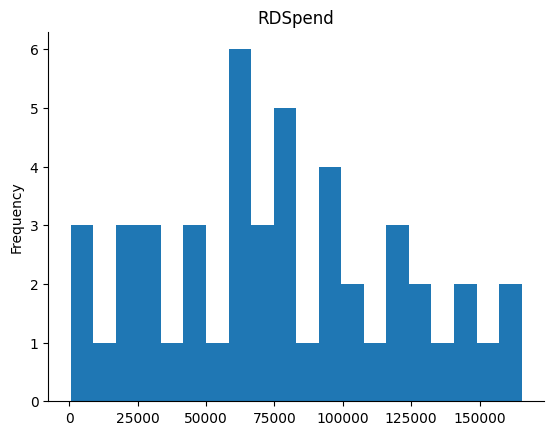

In [177]:
from matplotlib import pyplot as plt
df['RDSpend'].plot(kind='hist', bins=20, title='RDSpend')
plt.gca().spines[['top', 'right',]].set_visible(False)

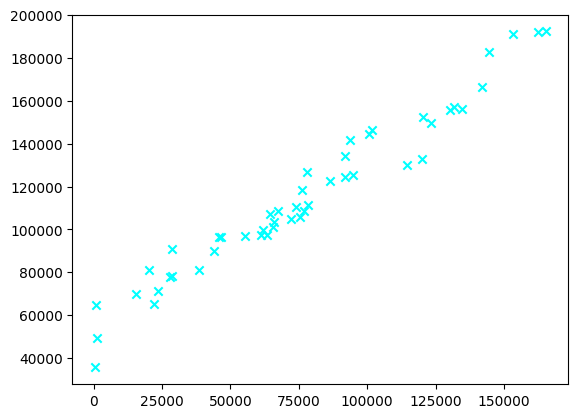

In [178]:
plt.scatter(df['RDSpend'],df['Profit'],color='cyan',marker='x',)

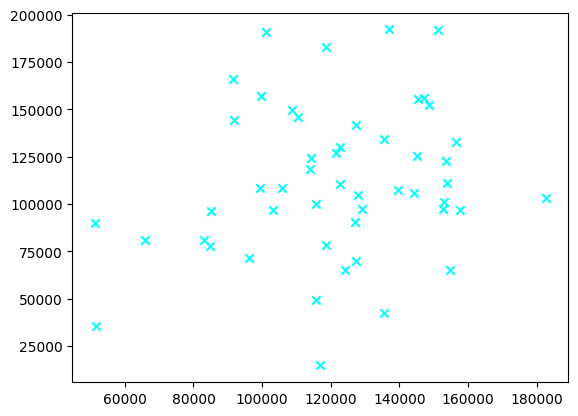

In [179]:
plt.scatter(df['Administration'],df['Profit'],color='cyan',marker='x',)

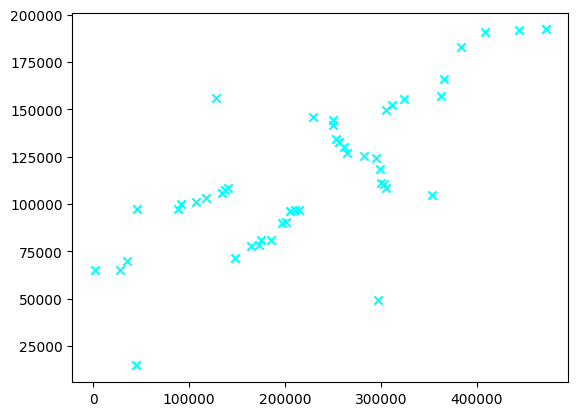

In [180]:
plt.scatter(df['MarketingSpend'],df['Profit'],color='cyan',marker='x',)

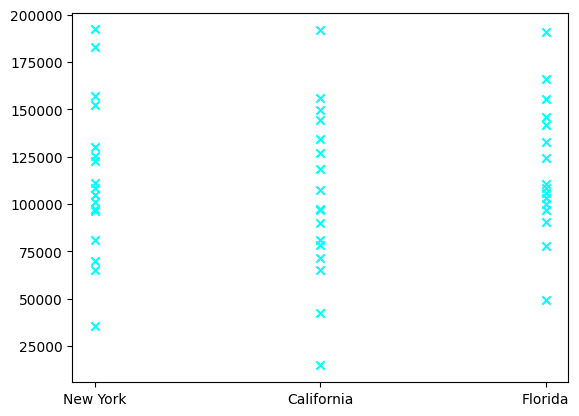

In [181]:
plt.scatter(df['State'],df['Profit'],color='cyan',marker='x',)

# Exploratory Data Analysis

# Exploratory data analysis

In [239]:
df.corr(numeric_only= True)

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.269749,0.708253,0.977401
Administration,0.269749,1.000000,-0.076943,0.200717
MarketingSpend,0.708253,-0.076943,1.000000,0.747434
Profit,0.977401,0.200717,0.747434,1.000000


# Checking for Outliers

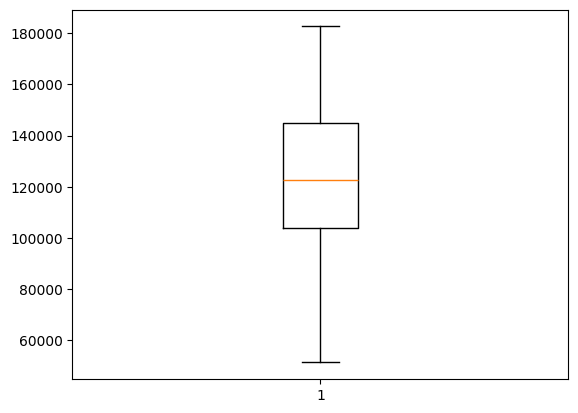

In [184]:
plt.boxplot(df['Administration'])
plt.show()

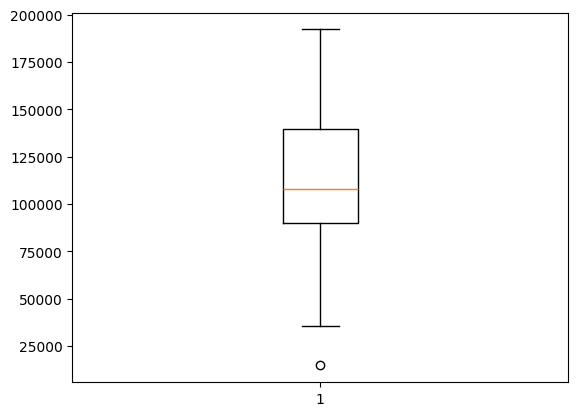

In [186]:
plt.boxplot(df['Profit'])
plt.show()

In [193]:
x.replace(np.nan,x.mean(),inplace=True)

In [243]:
x.isna().sum()

,0
RDSpend,0
Administration,0
MarketingSpend,0
State,0


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [188]:
x=df.drop('Profit',axis=1)
y=df['Profit']

In [189]:
print(x.shape,y.shape)

(50, 4) (50,)


In [190]:
x.head()

,RDSpend,Administration,MarketingSpend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [191]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['State']=le.fit_transform(df['State'])

In [192]:
list(le.classes_)

['California', 'Florida', 'New York']

In [203]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [208]:
poly=PolynomialFeatures()
x2=poly.fit(x)

In [196]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=0)

In [209]:
from sklearn.linear_model import LinearRegression


In [210]:
param_distribution={
    'fit_intercept':[True,False],
    'copy_X':[True,False],
    'n_jobs':[1,2,3,4,5,6,7,8,9,10],
    'positive':[True,False]
}

model=RandomizedSearchCV(LinearRegression(),param_distributions= param_distribution,n_iter=10,cv=5
                          )

In [211]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [212]:
model.score(x_train,y_train)

0.8299419281368576

In [214]:
model.predict(x_test)

array([113290.62374633, 130992.83507168, 133447.10982728,  75240.91947093,
       202525.66052124,  88814.78910932,  60715.20264249, 105513.19577316,
       108995.82534952, 189553.48649964])

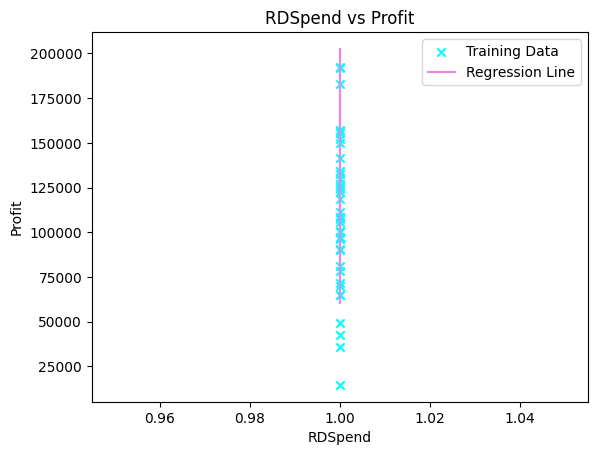

In [242]:
plt.scatter(x_train[:,0], y_train, color='cyan', marker='x', label='Training Data')
plt.plot(x_test[:,0], model.predict(x_test), color='violet', linestyle='-', label='Regression Line')
plt.xlabel('RDSpend')
plt.ylabel('Profit')
plt.title('RDSpend vs Profit')
plt.legend()
plt.show()

In [215]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(x_test))

0.8537518601607242